In [21]:
import tensorflow as tf 

In [22]:
import numpy as np

from tensorflow.keras.layers import Dense,Input,Conv2D,Flatten,Dropout

from tensorflow.keras.models import Model

In [23]:
fashion_mnist=tf.keras.datasets.fashion_mnist
(x_train,y_train),(x_test,y_test)=fashion_mnist.load_data()
x_train,x_test=x_train/255.0,x_test/255.0


In [24]:
#default dimensions of this is[28,28] this is ok if this is  feed forward network but we are working in CNN and we need a 3d array 
#so for this we add another dimension of 1 
#np.expand_dims(x_train, -1) adds a new axis at the last position, converting the shape to (100, 28, 28, 1). This makes each image have a channel dimension, which is required for many deep learning models.
x_train=np.expand_dims(x_train,-1)
x_test=np.expand_dims(x_test,-1)
x_train.shape 

(60000, 28, 28, 1)

In [25]:
x_train[0].shape

(28, 28, 1)

In [26]:
K=len(set(y_train))
K

10

In [31]:
#fitting the model is the next step first we need to create a Cnn network before actually training/fitting so
#we need to create Cnn of wanted nodes/layers
i=Input(shape=x_train[0].shape)
x=Conv2D(32,(3,3),strides=2,activation='relu')(i)
x=Conv2D(64,(3,3),strides=2,activation="relu")(x)
x=Conv2D(128,(3,3),strides=2,activation="relu")(x)
x=Flatten()(x)
x=Dropout(0.2)(x)
x=Dense(512,activation="relu")(x)
x=Dropout(0.2)(x)
x=Dense(K,activation="softmax")(x)

model=Model(i,x)

model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)

r=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=15)




Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7451 - loss: 0.7025 - val_accuracy: 0.8465 - val_loss: 0.4011
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8593 - loss: 0.3767 - val_accuracy: 0.8723 - val_loss: 0.3585
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8797 - loss: 0.3203 - val_accuracy: 0.8774 - val_loss: 0.3251
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8904 - loss: 0.2849 - val_accuracy: 0.8848 - val_loss: 0.3128
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9036 - loss: 0.2546 - val_accuracy: 0.8882 - val_loss: 0.3052
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9123 - loss: 0.2295 - val_accuracy: 0.8980 - val_loss: 0.2924
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9214 - loss: 0.2096 - val_accuracy: 0.8915 - val_loss: 0.3059
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9254 - loss: 0.1913 - 

In [32]:
import matplotlib.pyplot as plt

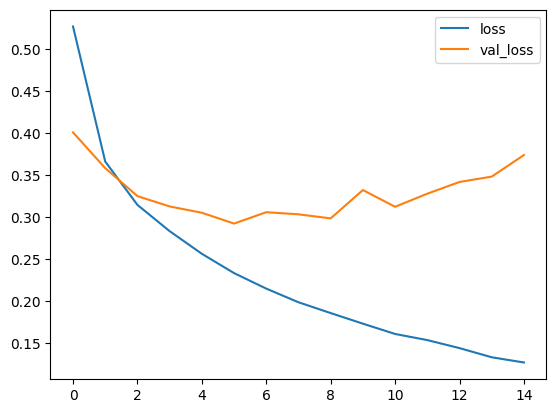

In [33]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label="val_loss")
plt.legend()

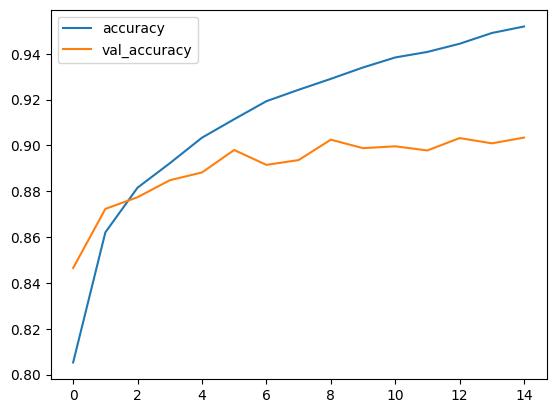

In [34]:
plt.plot(r.history['accuracy'],label='accuracy')
plt.plot(r.history['val_accuracy'],label="val_accuracy")
plt.legend()

In [ ]:
from sklearn.metrics import confusion_matrix 
import itertools

def plot_consufion_matrix(cm,classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):
    